# Non-residential building HVAC system

## Advanced Time-Series-specific plots

### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load data

In [3]:
dataset_1 = pd.read_parquet("../../data/clean/building_clean1.parquet.gzip");
dataset_2 = pd.read_parquet("../../data/clean/building_clean2.parquet.gzip");
dataset_3 = pd.read_parquet("../../data/clean/building_clean3.parquet.gzip");
dataset_4 = pd.read_parquet("../../data/clean/building_clean4.parquet.gzip");

### Quick overview of the curated datasets

In [4]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12376 entries, 0 to 12375
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Timestamp     12376 non-null  datetime64[ns]
 1   T_Supply      12376 non-null  float64       
 2   T_Return      12376 non-null  float64       
 3   SP_Return     12376 non-null  float64       
 4   T_Saturation  12376 non-null  float64       
 5   T_Outdoor     12376 non-null  float64       
 6   RH_Supply     12376 non-null  float64       
 7   RH_Return     12376 non-null  float64       
 8   RH_Outdoor    12376 non-null  float64       
 9   Energy        12376 non-null  float64       
 10  Power         12376 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 1.1 MB


In [5]:
dataset_1.memory_usage().sum() / 1000000

1.188096

In [6]:
dfs = [dataset_1, dataset_2, dataset_3, dataset_4];
labels = [f"dataset_{i+1}" for i in range(4)];
df_sizes = [df.shape[0] for df in dfs];
df_memory = [np.round(df.memory_usage().sum() / 1000000, 3) for df in dfs];

size_df = pd.DataFrame(data={"Dataset": labels, "Data_points": df_sizes, "Mem_usage": df_memory});

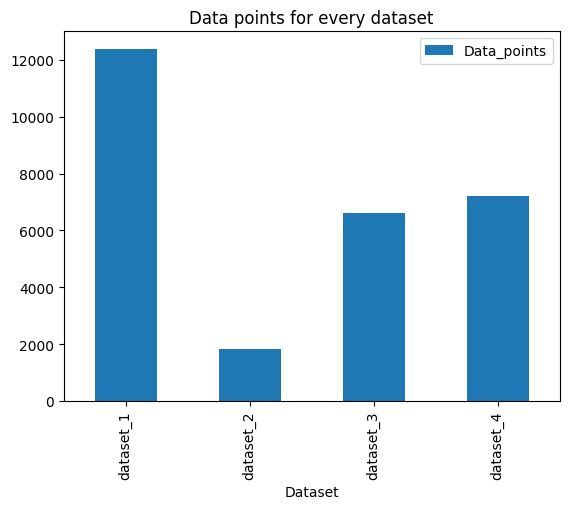

In [7]:
size_df.plot(kind="bar", x="Dataset", y="Data_points", title="Data points for every dataset");

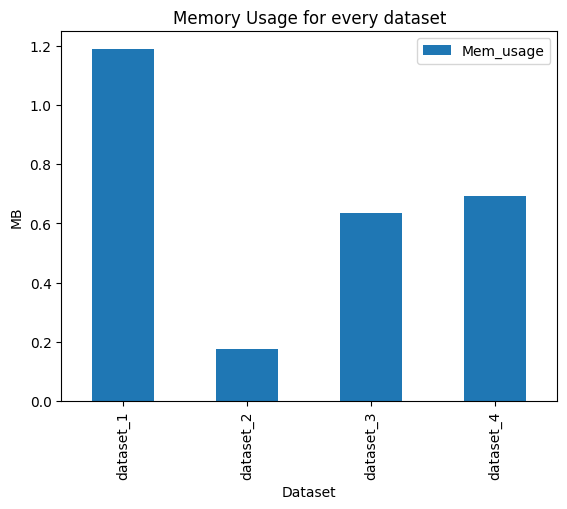

In [8]:
size_df.plot(kind="bar", x="Dataset", y="Mem_usage", title="Memory Usage for every dataset", ylabel="MB");

### Differenced time series plots

In [9]:
diff_1 = dataset_1.diff().dropna();
diff_1["Timestamp"] = dataset_1.Timestamp[1:];
print(diff_1.shape[0]);
diff_1.head()

12375


,Timestamp,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power
1,2019-10-27 02:15:00,-0.010000,-0.014999,0.0,0.000000,0.0,0.000000,0.119995,0.0,0.0,0.0
2,2019-10-27 02:30:00,0.000000,-0.005000,0.0,0.000000,0.0,0.040001,0.110001,0.0,0.0,0.0
3,2019-10-27 02:45:00,-0.040001,-0.010000,0.0,-0.020000,0.0,0.020004,0.160004,0.0,0.0,0.0
4,2019-10-27 03:00:00,-0.010000,-0.010000,0.0,-0.020001,0.0,0.000000,0.510002,0.0,0.0,0.0
5,2019-10-27 03:15:00,-0.019999,-0.010000,0.0,-0.020000,0.0,0.000000,0.070000,0.0,0.0,0.0


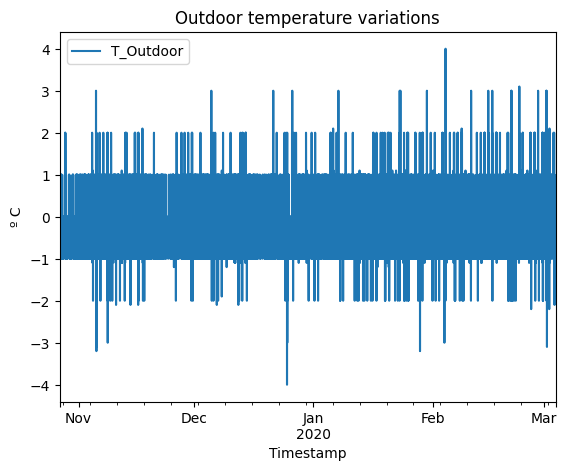

In [10]:
diff_1.plot(kind="line", x="Timestamp", y="T_Outdoor", title="Outdoor temperature variations", ylabel="º C");

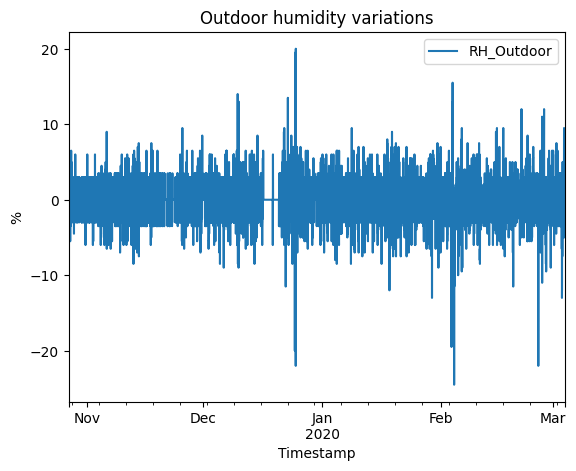

In [11]:
diff_1.plot(kind="line", x="Timestamp", y="RH_Outdoor", title="Outdoor humidity variations", ylabel="%");

#### Observation

The differenced outdoor temperature series appears to be stationary. As for the differenced humidity time series, there seems to be a slight uptick in its variance as time goes on.

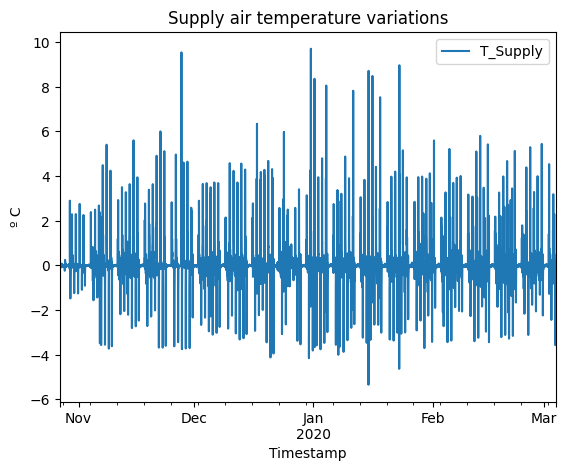

In [12]:
diff_1.plot(kind="line", x="Timestamp", y="T_Supply", title="Supply air temperature variations", ylabel="º C");

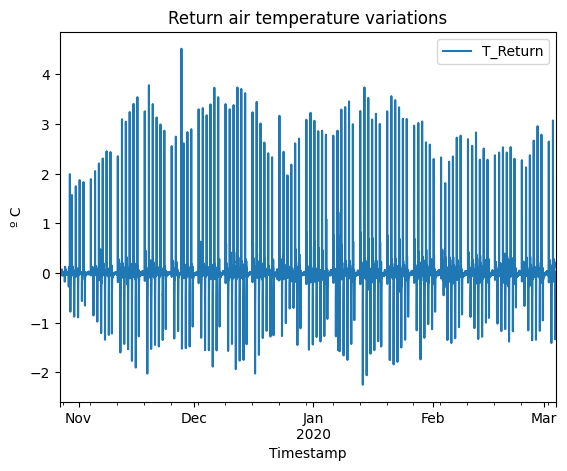

In [13]:
diff_1.plot(kind="line", x="Timestamp", y="T_Return", title="Return air temperature variations", ylabel="º C");

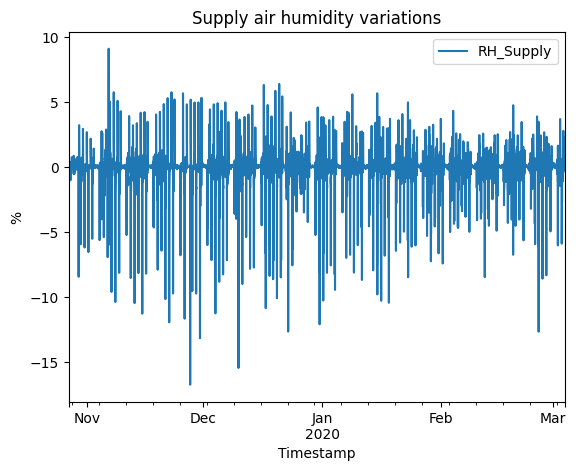

In [14]:
diff_1.plot(kind="line", x="Timestamp", y="RH_Supply", title="Supply air humidity variations", ylabel="%");

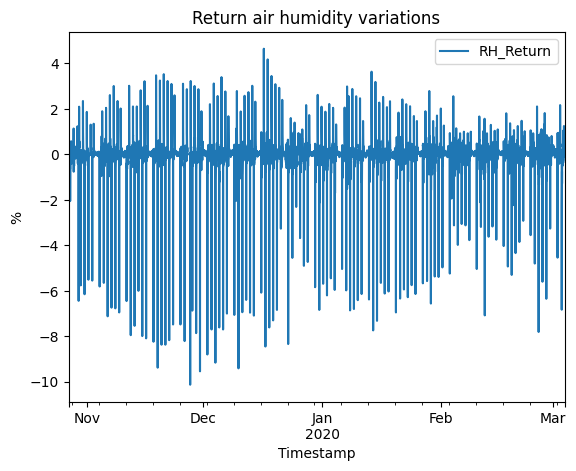

In [15]:
diff_1.plot(kind="line", x="Timestamp", y="RH_Return", title="Return air humidity variations", ylabel="%");

#### Observations

- While the differenced supply air temperature seems to be a stationary time series with a non-zero mean, there is almost certainly a significantly mean variation in the differenced return air temperature series;

- Both differenced series pertaining to humidity values appear to be non-stationary. The variance of the return air humidity series, in particular, seems to undergo quite the variation.

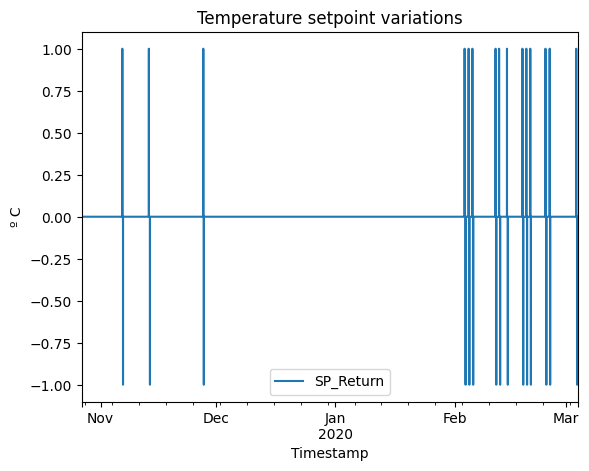

In [16]:
diff_1.plot(kind="line", x="Timestamp", y="SP_Return", title="Temperature setpoint variations", ylabel="º C");

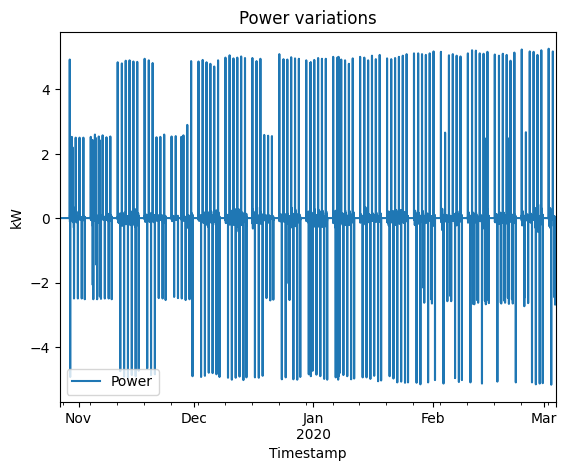

In [17]:
diff_1.plot(kind="line", x="Timestamp", y="Power", title="Power variations", ylabel="kW");

#### Observations

- The differenced power series appears to be stationary. There might be a slight variation in its mean due to the fact that the heating system does not seem to be operating at full power early on;

- Setpoint changes are so rare that this variable, by itself, is useless.

### Differenced Trajectory Plots

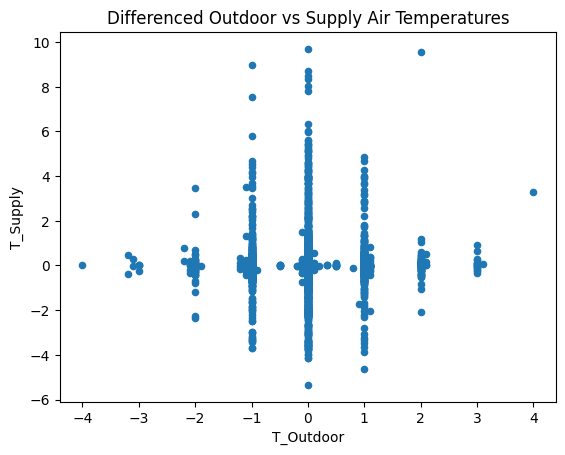

In [18]:
diff_1.plot(kind="scatter", x="T_Outdoor", y="T_Supply", title="Differenced Outdoor vs Supply Air Temperatures");

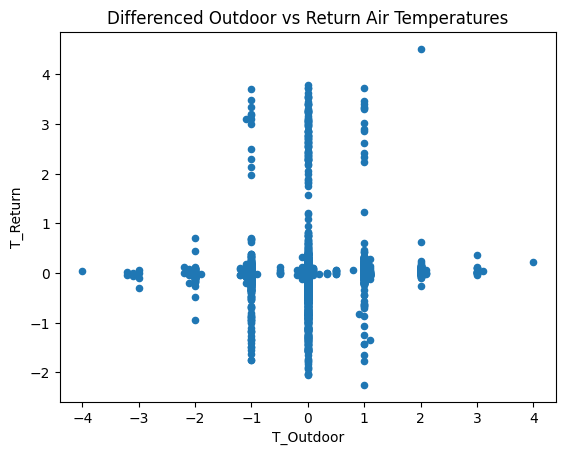

In [19]:
diff_1.plot(kind="scatter", x="T_Outdoor", y="T_Return", title="Differenced Outdoor vs Return Air Temperatures");

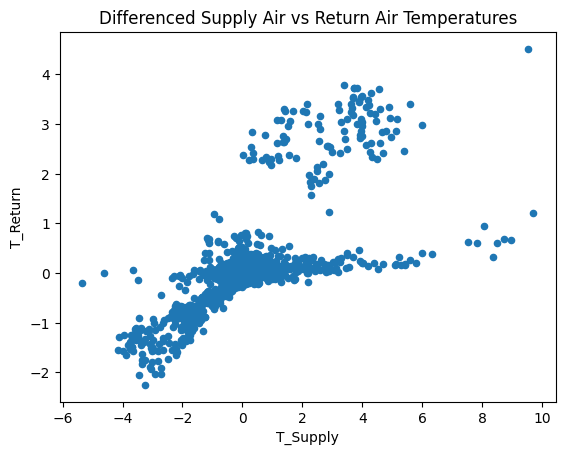

In [20]:
diff_1.plot(kind="scatter", x="T_Supply", y="T_Return", title="Differenced Supply Air vs Return Air Temperatures");

#### Observation

While the plots involving the outdoor temperature are not very informative, two clusters are clearly discernable in the trajectory plot of the differenced return air and supply air temperatures. This may be very helpful, as standard distance and density-based anomaly detection approaches may be applicable. Perhaps the data points that cannot be adequately attributed to any cluster represent anomalies. Alternatively, the points belonging to one of the clusters could also be the result of a malfunction (most likely those belonging to the smallest cluster).

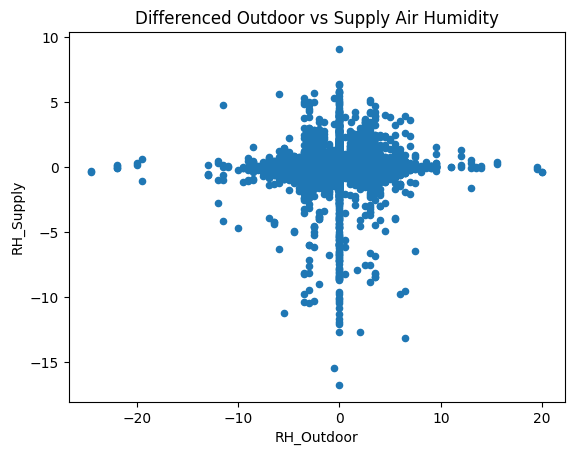

In [21]:
diff_1.plot(kind="scatter", x="RH_Outdoor", y="RH_Supply", title="Differenced Outdoor vs Supply Air Humidity");

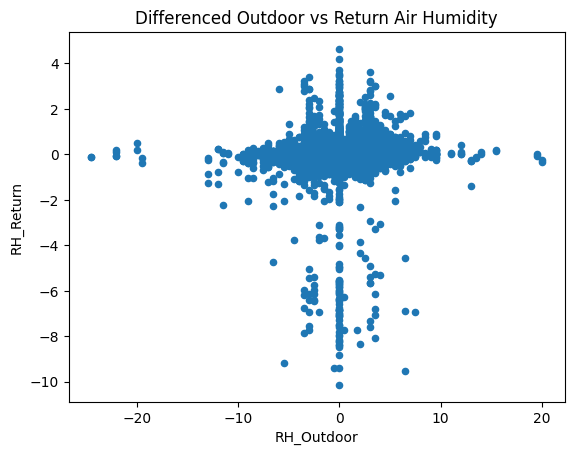

In [22]:
diff_1.plot(kind="scatter", x="RH_Outdoor", y="RH_Return", title="Differenced Outdoor vs Return Air Humidity");

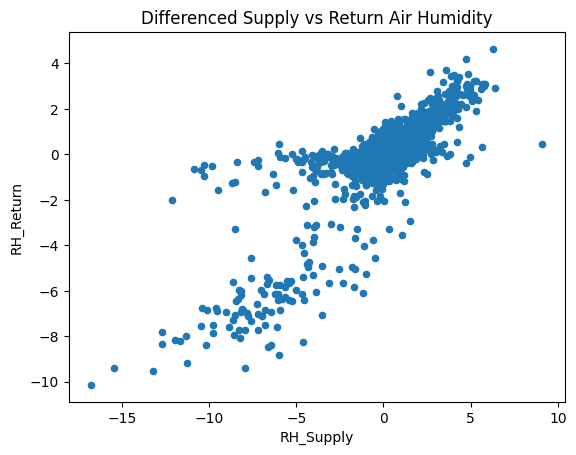

In [23]:
diff_1.plot(kind="scatter", x="RH_Supply", y="RH_Return", title="Differenced Supply vs Return Air Humidity");

#### Observation

Once again, the plots involving the outdoor variable (in this case, humidity), do not look very informative, although a few distant points are discernable. On the other hand, there seems to be a very strong linear relation between the supply air and the return air humidities. This is something that could definitely be exploited for anomaly detection purposes. 

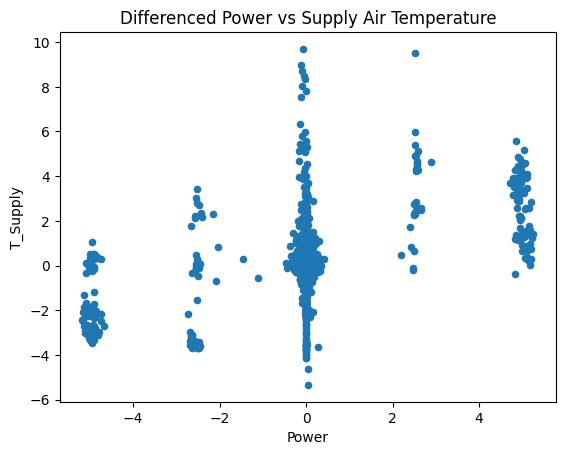

In [24]:
diff_1.plot(kind="scatter", x="Power", y="T_Supply", title="Differenced Power vs Supply Air Temperature");

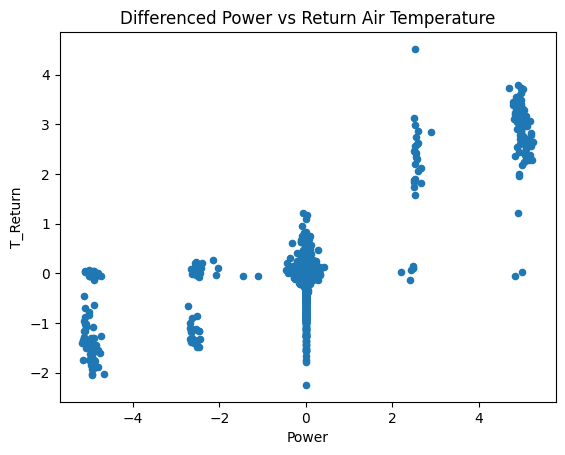

In [25]:
diff_1.plot(kind="scatter", x="Power", y="T_Return", title="Differenced Power vs Return Air Temperature");

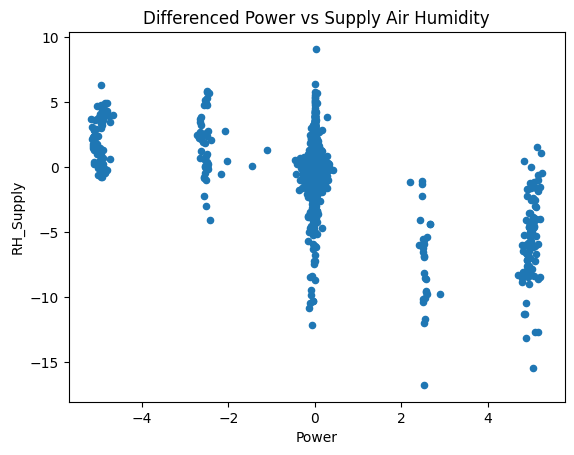

In [26]:
diff_1.plot(kind="scatter", x="Power", y="RH_Supply", title="Differenced Power vs Supply Air Humidity");

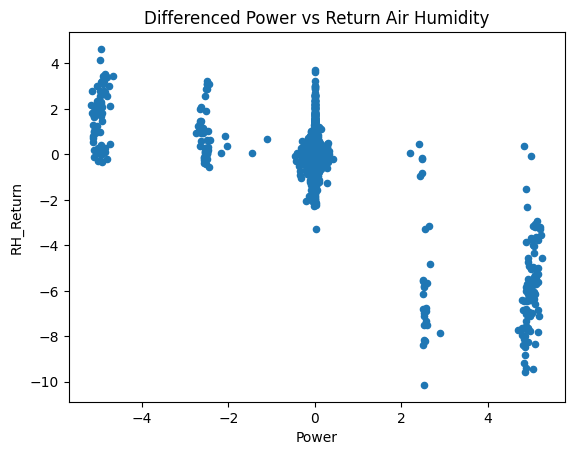

In [27]:
diff_1.plot(kind="scatter", x="Power", y="RH_Return", title="Differenced Power vs Return Air Humidity");

#### Observation

The plots of differenced temperature and humidity variables vs differenced power seem to be in accordance with what could be expected from the physics. Turning on the heating results in an increase in temperature and a decrease in humidity. Whether a given point in these plots represents an anomaly or not depends on the outside conditions. This could be assessed using by using a third coordinate (outside temperature or humidity) to produce either a 3D plot or a coloured 2D plot.

### Coloured plots

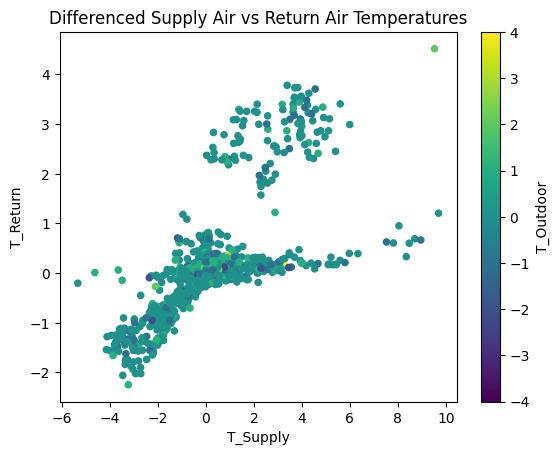

In [29]:
diff_1.plot(kind="scatter", 
            x="T_Supply", 
            y="T_Return", 
            title="Differenced Supply Air vs Return Air Temperatures", 
            c="T_Outdoor", cmap="viridis");

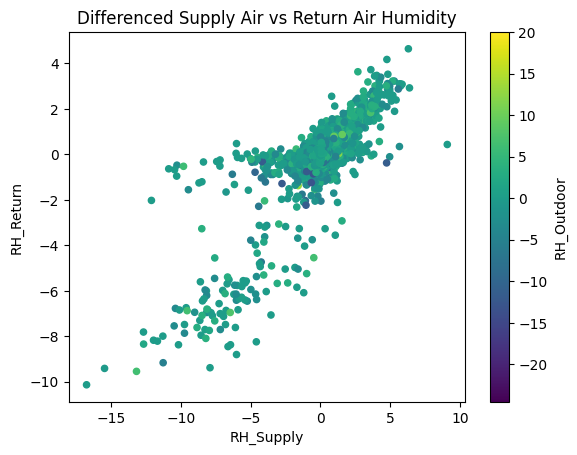

In [30]:
diff_1.plot(kind="scatter", 
            x="RH_Supply", 
            y="RH_Return", 
            title="Differenced Supply Air vs Return Air Humidity", 
            c="RH_Outdoor", cmap="viridis");

#### Observation

The relations between the differenced temperature and humidity values seem to hold for all values of the respective outdoor variable.

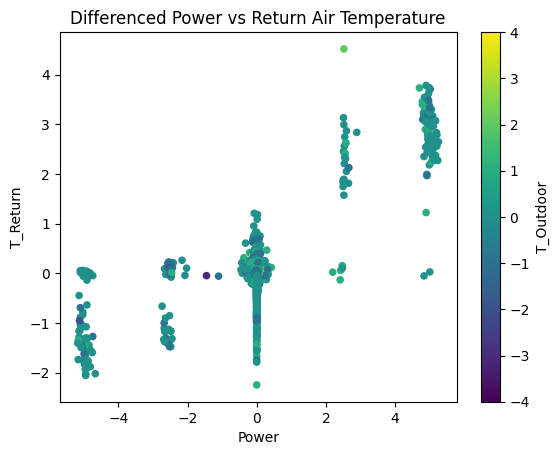

In [39]:
diff_1.plot(kind="scatter", 
            x="Power", 
            y="T_Return", 
            title="Differenced Power vs Return Air Temperature", 
            c="T_Outdoor", cmap="viridis");

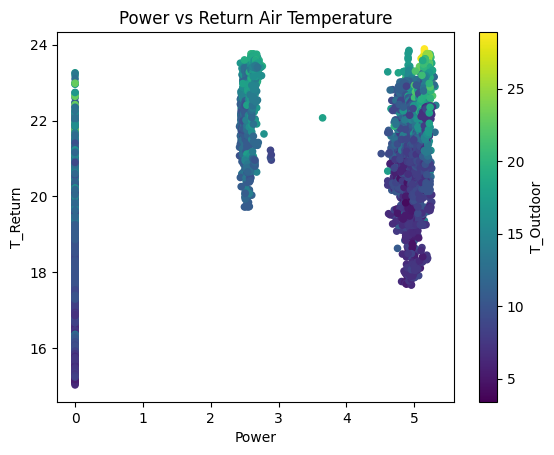

In [37]:
dataset_1.plot(kind="scatter", 
               x="Power", 
               y="T_Return", 
               title="Power vs Return Air Temperature", 
               c="T_Outdoor", cmap="viridis");

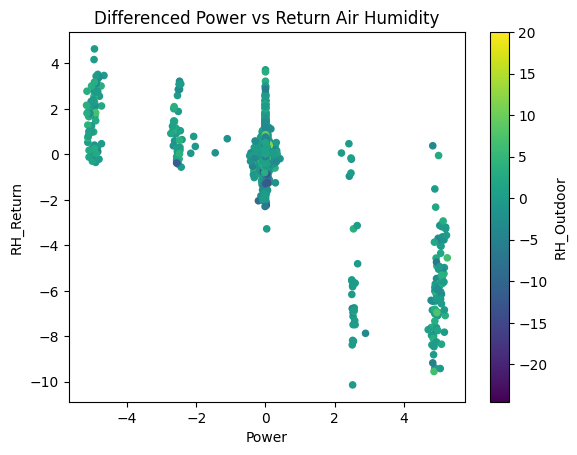

In [34]:
diff_1.plot(kind="scatter", 
            x="Power", 
            y="RH_Return", 
            title="Differenced Power vs Return Air Humidity", 
            c="RH_Outdoor", cmap="viridis");

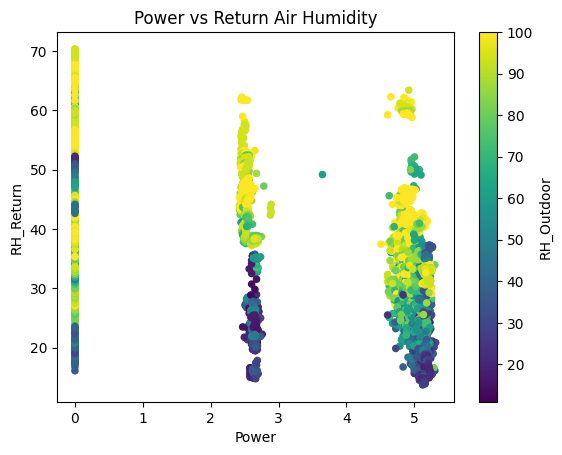

In [38]:
dataset_1.plot(kind="scatter", 
               x="Power", 
               y="RH_Return", 
               title="Power vs Return Air Humidity", 
               c="RH_Outdoor", cmap="viridis");

#### Observation

Not much can be concluded from these plots. The only noteworthy aspect is that higher return air humidity values correspond to higher outside humidity values when the HVAC system is turned on, as expected.

### Seasonal Plots